# Desafios

## Desafio Aula 01

In [8]:
import pandas as pd
import json

In [9]:
with open("informacoes.json", encoding="UTF-8") as json_informacoes:
    json_d1_bruto = json.load(json_informacoes)
json_d1_bruto

{'nome': 'João',
 'idade': 28,
 'enderecos': [{'tipo': 'casa',
   'rua': 'Rua A',
   'numero': 123,
   'cidade': 'São Paulo'},
  {'tipo': 'trabalho',
   'rua': 'Rua B',
   'numero': 456,
   'cidade': 'Rio de Janeiro'}]}

In [10]:
dados_d1=pd.json_normalize(json_d1_bruto, record_path= "enderecos", meta=["nome", "idade"])
dados_d1

,tipo,rua,numero,cidade,nome,idade
0,casa,Rua A,123,São Paulo,João,28
1,trabalho,Rua B,456,Rio de Janeiro,João,28


## Desafio Aula 02

In [11]:
with open("dados.json", encoding="UTF-8") as json_dados_d2:
    json_d2_bruto = json.load(json_dados_d2)
json_d2_bruto

{'pessoas': [{'nome': 'João',
   'idade': '25',
   'endereco': {'rua': 'Rua A', 'numero': 123, 'cidade': 'São Paulo'},
   'telefones': ['11 1111-1111', '11 2222-2222']},
  {'nome': 'Maria',
   'idade': 30,
   'endereco': {'rua': '', 'numero': 456, 'cidade': 'Rio de Janeiro'},
   'telefones': ['21 3333-3333']}]}

In [12]:
dados_d2 = pd.json_normalize(json_d2_bruto, record_path="pessoas")
dados_d2

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo
1,Maria,30,[21 3333-3333],,456,Rio de Janeiro


In [13]:
dados_d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             2 non-null      object
 1   idade            2 non-null      object
 2   telefones        2 non-null      object
 3   endereco.rua     2 non-null      object
 4   endereco.numero  2 non-null      int64 
 5   endereco.cidade  2 non-null      object
dtypes: int64(1), object(5)
memory usage: 228.0+ bytes


In [14]:
dados_d2["idade"] = dados_d2["idade"].astype("Int64")
dados_d2.info()

TypeError: cannot safely cast non-equivalent object to int64

In [ ]:
dados_d2_filtrado = dados_d2.query('`endereco.rua` != ""').copy()
dados_d2_filtrado.head()

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo


## Desafio Aula 04

In [16]:
import pandas as pd

# criando um DataFrame com 30 transações aleatórias
df = pd.DataFrame({
    'ID da transação': range(1, 31),
    'Valor da transação': [100, 200, 150, 500, 300, 913, 250, 400, 200, 150, 
                           200, 200, 400, 300, 150, 301, 805, 300, 400, 250, 
                           150, 100, 500, 600, 200, 350, 100, 250, 800, 250],
    'Data da transação': pd.date_range(start='2022-01-01', end='2022-01-30', freq='D'),
    'Local da transação': ['São Paulo, Brasil', 'Rio de Janeiro, Brasil', 'Belo Horizonte, Brasil', 'São Paulo, Brasil', 
                           'São Paulo, Brasil', 'Nova Iorque, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'Rio de Janeiro, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Los Angeles, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Miami, EUA', 'São Paulo, Brasil']
})

df

,ID da transação,Valor da transação,Data da transação,Local da transação
0,1,100,2022-01-01,"São Paulo, Brasil"
1,2,200,2022-01-02,"Rio de Janeiro, Brasil"
2,3,150,2022-01-03,"Belo Horizonte, Brasil"
3,4,500,2022-01-04,"São Paulo, Brasil"
4,5,300,2022-01-05,"São Paulo, Brasil"
5,6,913,2022-01-06,"Nova Iorque, EUA"
6,7,250,2022-01-07,"São Paulo, Brasil"
7,8,400,2022-01-08,"São Paulo, Brasil"
8,9,200,2022-01-09,"São Paulo, Brasil"
9,10,150,2022-01-10,"Rio de Janeiro, Brasil"


In [17]:
df.describe()

,ID da transação,Valor da transação,Data da transação
count,30.000000,30.000000,30
mean,15.500000,325.633333,2022-01-15 12:00:00
min,1.000000,100.000000,2022-01-01 00:00:00
25%,8.250000,200.000000,2022-01-08 06:00:00
50%,15.500000,250.000000,2022-01-15 12:00:00
75%,22.750000,400.000000,2022-01-22 18:00:00
max,30.000000,913.000000,2022-01-30 00:00:00
std,8.803408,214.442579,NaN


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Valor da transação'>

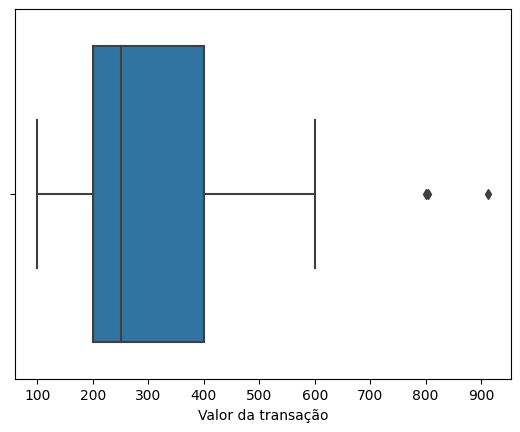

In [19]:
sns.boxplot(x=df["Valor da transação"])

In [21]:
Q1 = df["Valor da transação"].quantile(.25)
Q3 = df["Valor da transação"].quantile(.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [22]:
outliers = df[(df["Valor da transação"] < limite_inferior) | (df["Valor da transação"] > limite_superior)]
outliers

,ID da transação,Valor da transação,Data da transação,Local da transação
5,6,913,2022-01-06,"Nova Iorque, EUA"
16,17,805,2022-01-17,"Los Angeles, EUA"
28,29,800,2022-01-29,"Miami, EUA"


In [23]:
def identifica_outliers(df, coluna):
    Q1 = df[coluna].quantile(.25)
    Q3 = df[coluna].quantile(.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers

In [24]:
identifica_outliers(df, "Valor da transação")

,ID da transação,Valor da transação,Data da transação,Local da transação
5,6,913,2022-01-06,"Nova Iorque, EUA"
16,17,805,2022-01-17,"Los Angeles, EUA"
28,29,800,2022-01-29,"Miami, EUA"
